In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('adult.csv')

In [3]:
data.shape

(32561, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

<AxesSubplot:xlabel='race', ylabel='hours.per.week'>

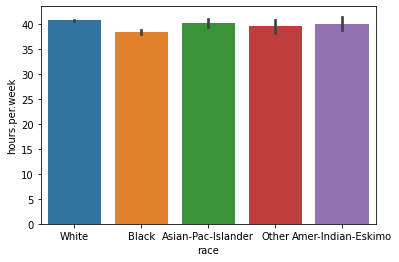

In [7]:
sns.barplot(data=data, x='race', y='hours.per.week')

<AxesSubplot:xlabel='race', ylabel='count'>

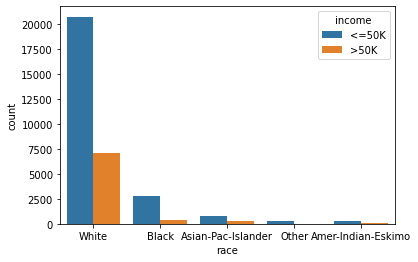

In [8]:
sns.countplot(data=data, x='race', hue='income')

In [9]:
races = list(data.race.unique())

In [10]:
data[data.race=='White'].income.value_counts(normalize=True)

<=50K    0.74414
>50K     0.25586
Name: income, dtype: float64

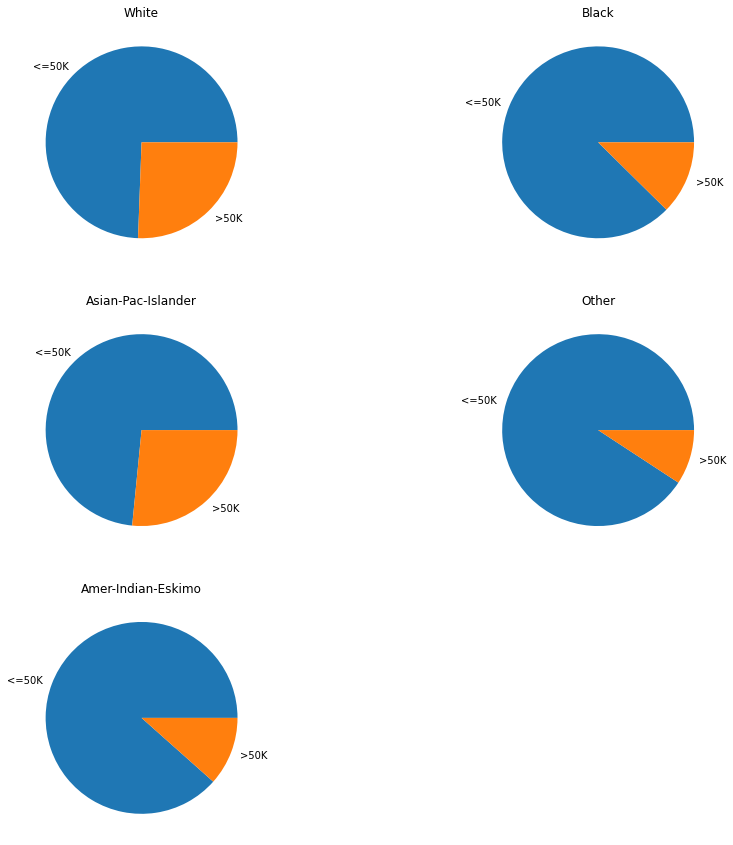

In [11]:
counter = 1
plt.figure(figsize=(15, 15))
for race in races:
    data_here = data[data.race==race]
    plt.subplot(3,2,counter)
    plt.pie(data_here.income.value_counts(normalize=True),labels=data_here.income.value_counts(normalize=True).index)
    plt.title(race)
    counter += 1

In [19]:
educations = list(data.education.unique())

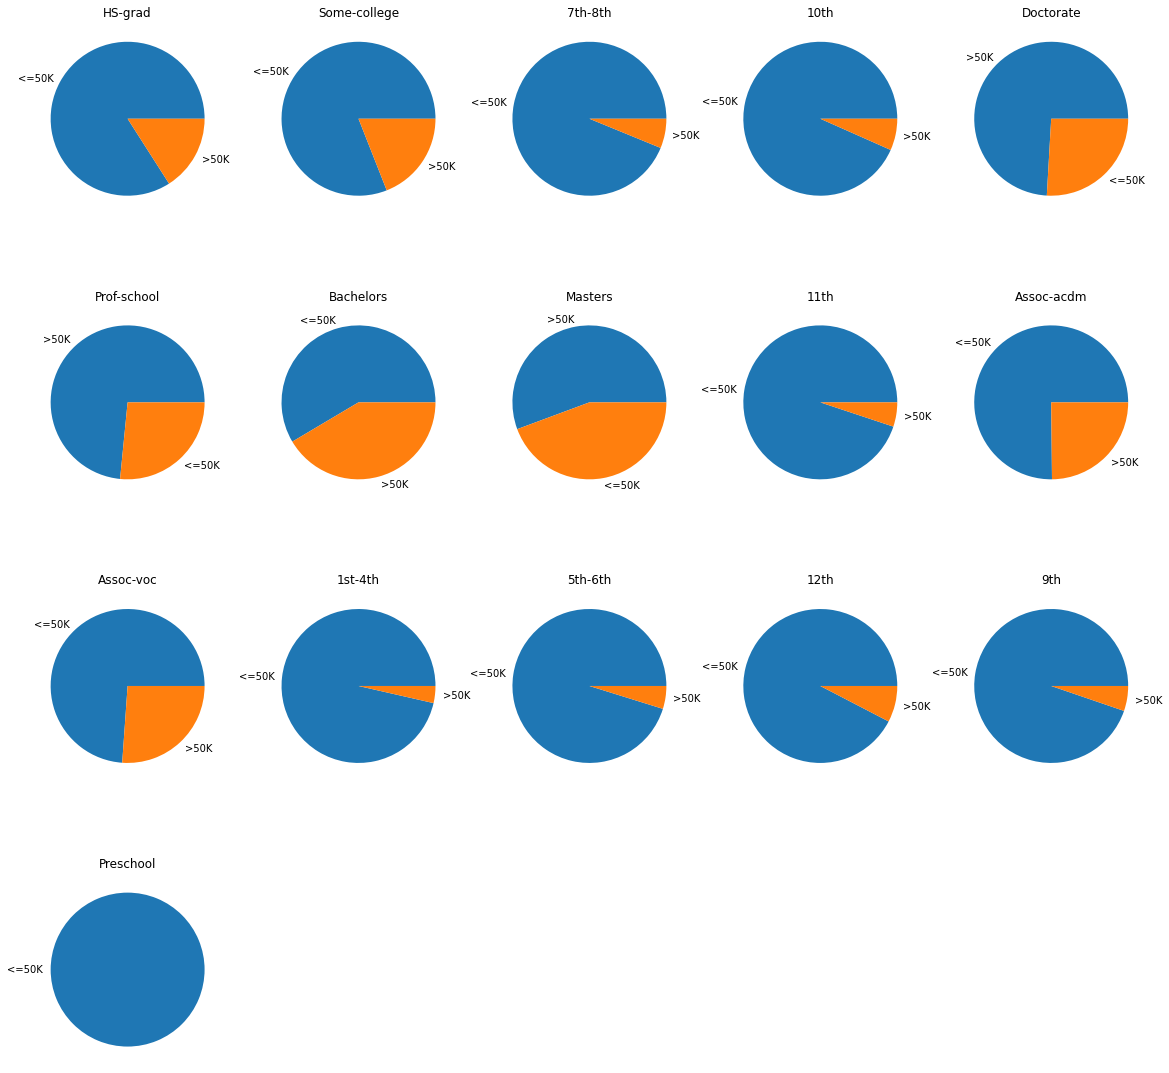

In [22]:
counter = 1
plt.figure(figsize=(20, 20))
for education in educations:
    data_here = data[data.education==education]
    plt.subplot(4,5,counter)
    plt.pie(data_here.income.value_counts(normalize=True),labels=data_here.income.value_counts(normalize=True).index)
    plt.title(education)
    counter += 1

In [23]:
data.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [24]:
data.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [26]:
relation = list(data.relationship.unique())

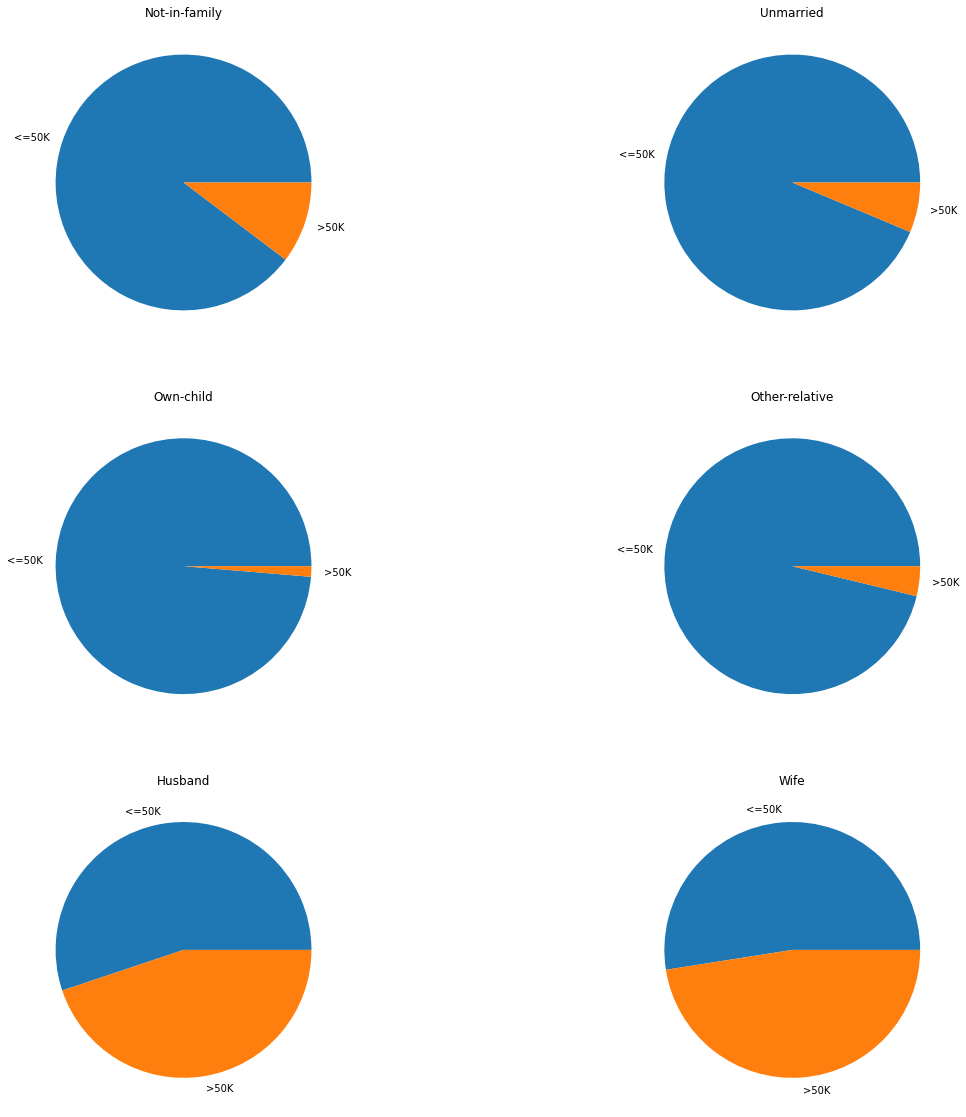

In [28]:
relation = list(data.relationship.unique())
counter = 1
plt.figure(figsize=(20, 20))
for rel in relation:
    data_here = data[data.relationship==rel]
    plt.subplot(3,2,counter)
    plt.pie(data_here.income.value_counts(normalize=True),labels=data_here.income.value_counts(normalize=True
    plt.title(rel)
    counter += 1

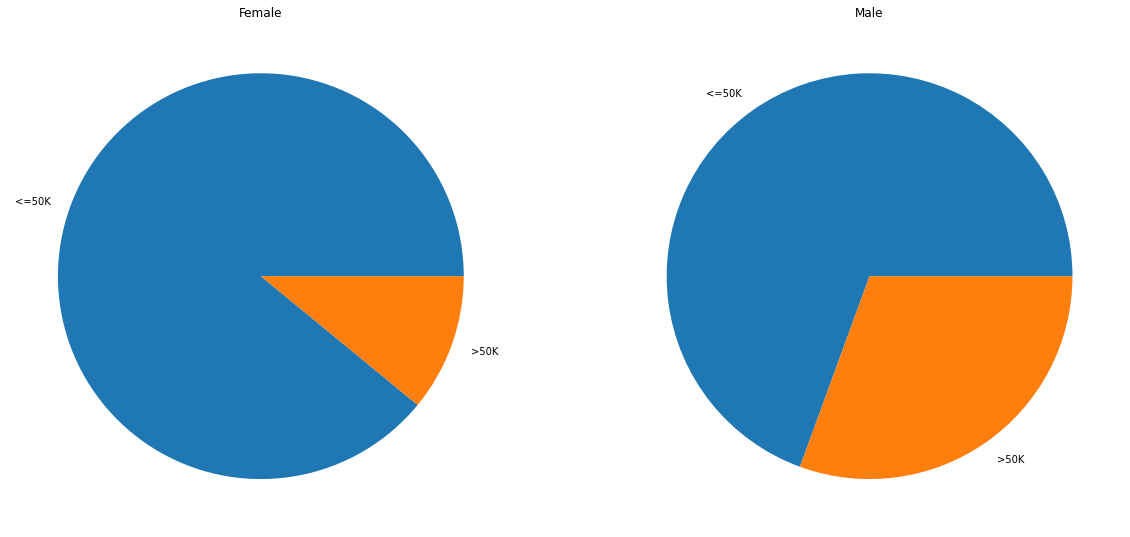

In [29]:
sexes = list(data.sex.unique())
counter = 1
plt.figure(figsize=(20, 20))
for sex in sexes:
    data_here = data[data.sex==sex]
    plt.subplot(1,2,counter)
    plt.pie(data_here.income.value_counts(normalize=True),labels=data_here.income.value_counts(normalize=True).index)
    plt.title(sex)
    counter += 1

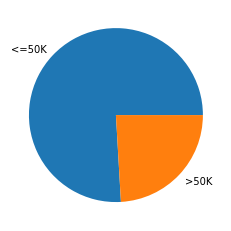

In [31]:
bigd = data.income.value_counts(normalize=True)
plt.pie(bigd, labels=bigd.index)
plt.show()

In [34]:
data['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [36]:
percent={}
for i in data['marital.status'].value_counts().index:
    counts = data[data['marital.status']==i]['income'].value_counts(normalize=True)
    percent[i] = counts

In [37]:
perdf=pd.DataFrame(percent)

In [38]:
perdf.head()

,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
<=50K,0.553152,0.954039,0.895791,0.93561,0.914401,0.91866,0.565217
>50K,0.446848,0.045961,0.104209,0.06439,0.085599,0.08134,0.434783


In [39]:
education_pct = {}
edu_num = data['education.num'].unique()

for num in edu_num:
    DD = data[data['education.num']==num]
    pct = len(DD[DD.income=='>50K'])/len(DD)
    education_pct[num] = pct

In [48]:
pct_df = pd.DataFrame.from_dict(education_pct, orient='index')

In [50]:
pct_df.sort_index(inplace=True)

<AxesSubplot:>

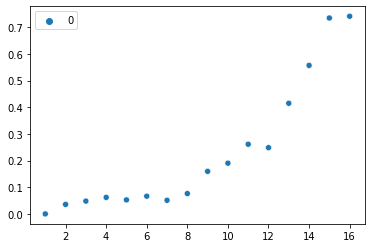

In [51]:
sns.scatterplot(data=pct_df)

In [57]:
data[data['education.num']>=13].head(15)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K
13,32,Private,136204,Masters,14,Separated,Exec-managerial,Not-in-family,White,Male,0,2824,55,United-States,>50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
15,46,Private,45363,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,0,2824,40,United-States,>50K
17,57,Private,317847,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Male,0,2824,50,United-States,>50K
19,34,Private,203034,Bachelors,13,Separated,Sales,Not-in-family,White,Male,0,2824,50,United-States,>50K
20,37,Private,188774,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,2824,40,United-States,>50K


In [54]:
len(data['education.num'].unique())

16